<a href="https://colab.research.google.com/github/autul2017831021/SWE_428_Machine_Learning_Tasks/blob/main/Regularized%20Logistic%20Regression%20(Classification)/Regularized_Logistic_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
import csv
import io
import math

In [66]:
from google.colab import files
uploaded = files.upload()

Saving data2.txt to data2 (1).txt


In [67]:
data = pd.read_csv(io.BytesIO(uploaded['data2.txt']), header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [68]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

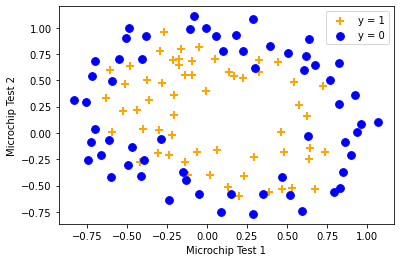

In [69]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [70]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
XX = x.values
Y = y.values

In [71]:
def mapFeature( x1col, x2col):
    degrees = 10
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [72]:
X = mapFeature(XX[:,0],XX[:,1])
print(X.shape, XX.shape)

(118, 66) (118, 2)


In [73]:
from scipy.special import expit #Vectorized sigmoid function

#Hypothesis function and cost function for logistic regression
def h(mytheta,X): #Logistic hypothesis function
    return expit(np.dot(X,mytheta))

In [74]:
#Cost function, default lambda (regularization) 0
def computeCost(mytheta,X,Y,mylambda = 0.): 

    m = Y.size # number of training examples

    term1 = np.dot(-np.array(Y).T,np.log(h(mytheta,X)))
    term2 = np.dot((1-np.array(Y)).T,np.log(1-h(mytheta,X)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [75]:
def sigmoid(param):
    param = np.clip( param, -500, 500 )           # protect against overflow
    res = 1.0/(1.0+np.exp(-param))
    return res

In [94]:
def gradient_descent(X,Y,thetas):
  row,col = X.shape
  cost = np.zeros(col)

  for i in range(row):
    sig_value = sigmoid(np.dot(X[i], thetas))  
    difference  = sig_value  - Y[i]                      
    for j in range(col):
      cost[j] = cost[j] + difference * X[i][j]        
  return cost

In [110]:
initial_theta = np.zeros(X.shape[1])

def optimizeRegularizedTheta(mytheta,X,Y,alpha,epoch,mylambda=0.):
    m = Y.shape[0]
    cost_track = []
    thetas = mytheta
    for i in range(epoch):
      cost = gradient_descent(X,Y,thetas)
      thetas = thetas * (1 - (mylambda/m)) - (alpha/m) * cost
      cost_track.append( computeCost(thetas,X,Y,mylambda) )
      # if i% 10 == 0 or i == epoch-1 :
      #   print(f"Iteration {i:4d}: Cost {cost_track[-1]}   ")

    return thetas,min(cost_track)

thetas,min_cost = optimizeRegularizedTheta(initial_theta,X,Y,0.1,100)
print(thetas.shape)
print(min_cost)

(66,)
0.6089396397803091


In [111]:
def plotBoundary(mytheta, X, Y, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,X,Y,0.1,1000,mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

[ 1.26417001e+00  7.35785885e-01  1.34575328e+00 -2.05425981e+00
 -9.41669252e-01 -1.20175477e+00  2.36484563e-01 -4.14345656e-01
 -4.16023101e-01 -1.18983482e-02 -1.50604511e+00 -8.73088139e-02
 -6.65501535e-01 -2.97257007e-01 -1.06321371e+00 -1.61310274e-01
 -2.42833027e-01 -7.79800864e-02 -2.93290541e-01 -3.33313239e-01
 -3.29543875e-01 -1.06496165e+00  5.95148218e-03 -3.24248588e-01
 -5.39771789e-03 -3.48586876e-01 -1.63715987e-01 -8.23557181e-01
 -3.06198193e-01 -1.24851523e-01 -5.83636352e-02 -1.27239389e-01
 -5.16787175e-02 -1.85022617e-01 -2.23006646e-01 -4.04024311e-01
 -7.79282173e-01  1.89835570e-02 -1.73872565e-01  3.56166116e-03
 -1.41519603e-01  1.15972201e-03 -2.05696985e-01 -1.09103872e-01
 -6.53303972e-01 -3.41124101e-01 -6.76487518e-02 -4.69828729e-02
 -5.38762103e-02 -2.75431258e-02 -7.21588493e-02 -2.43917876e-02
 -1.22763466e-01 -1.49737233e-01 -4.15713881e-01 -5.93250571e-01
  1.49229807e-02 -1.02432655e-01  3.34685185e-03 -6.41146049e-02
  7.96918805e-05 -7.52361

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: No contour levels were found within the data range.


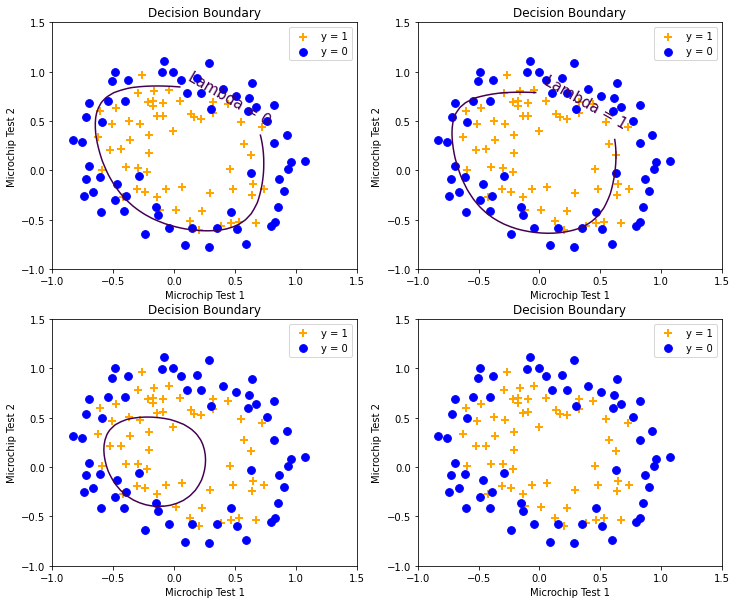

In [112]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,X,Y,0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,X,Y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,X,Y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,X,Y,50.)